## Meghana 

In [ ]:
import nltk
import pandas as pd
import numpy as np

In [ ]:
ls

NLP.1.ipynb
NLP.2.ipynb
NLP_Code/
TwitterHate.csv
Untitled.ipynb
sda___dsai___natural_language_processing_-28nlp-29___live_class-20210901_0759-1_1630503031.arf
text.txt


In [ ]:
df = pd.read_csv("TwitterHate.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
df.label.value_counts(normalize = True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [ ]:
tweets = list(df.tweet)
print(tweets[:5])

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    #motivation']


In [ ]:
tweets[1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

### Remove contractions

In [ ]:
import contractions

text = tweets[1]
expanded_words = []   

for word in text.split():
  # using contractions.fix to expand the shotened words
  expanded_words.append(contractions.fix(word))   
    
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)

Original text: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Expanded_text: @user @user thanks for #lyft credit i cannot use because they do not offer wheelchair vans in pdx. #disapointed #getthanked


In [ ]:
len(tweets)

31962

In [ ]:
no_cont_tweets = []   


for word in tweets:
  # using contractions.fix to expand the shotened words
  no_cont_tweets.append(contractions.fix(word))   
    
    
len(no_cont_tweets)

31962

### Lower case

In [ ]:
new_tweets = [x.lower() for x in no_cont_tweets]
for t in new_tweets[:5]:
    print(t)
    print("\n-----------")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run

-----------
@user @user thanks for #lyft credit i cannot use because they do not offer wheelchair vans in pdx.    #disapointed #getthanked

-----------
  bihday your majesty

-----------
#model   i love you take with you all the time in urð±!!! ððððð¦ð¦ð¦  

-----------
 factsguide: society now    #motivation

-----------


### Removing @Users & URLs

In [ ]:
import re

In [ ]:
re.sub("@\w+","", "@Meghana has an amazing account")

' has an amazing account'

In [ ]:
new_tweets = [re.sub("@\w+","", x) for x in new_tweets]

for t in new_tweets[:5]:
    print(t)
    print("\n-----------")

  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run

-----------
  thanks for #lyft credit i cannot use because they do not offer wheelchair vans in pdx.    #disapointed #getthanked

-----------
  bihday your majesty

-----------
#model   i love you take with you all the time in urð±!!! ððððð¦ð¦ð¦  

-----------
 factsguide: society now    #motivation

-----------


In [ ]:
n = 0
m = 0
for x in new_tweets:
    n += (np.sum(len(re.findall("www.\w+.\w+", x))))
    m += (np.sum(len(re.findall("\w+://\S+",x))))
    
    
print("Number of urls in tweets:", n+m)

Number of urls in tweets: 22


In [ ]:
new_tweets = [re.sub("www.\w+.\w+","", x) for x in new_tweets]

new_tweets = [re.sub("\w+://\S+","", x) for x in new_tweets]

In [ ]:
#After replacing urls with ""
n = 0
m = 0
for x in new_tweets:
    n += (np.sum(len(re.findall("www.\w+.\w+", x))))
    m += (np.sum(len(re.findall("\w+://\S+",x))))
    
    
print("Number of urls in tweets after using sub :", n+m)

Number of urls in tweets after using sub : 0


### Using TweetTokenizer to tokenize the tweets into individual terms.

In [ ]:
from nltk import TweetTokenizer

In [ ]:
tkn = TweetTokenizer()
print(tkn.tokenize(new_tweets[0]))

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run']


In [ ]:
tweet_token = [tkn.tokenize(sent) for sent in new_tweets]
print(tweet_token[0])
print(tweet_token[1000])

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run']
['just', 'booked', 'our', 'trip', 'to', 'europeð', '\x9f', '\x91', '\x8f', 'ð', '\x9f', '\x8f', '»', 'â', '\x9c', '\x88', 'ï', '¸', '\x8f', '#travelwise', '#europe2016', '#london', '#paris']


### Remove stop words

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

In [ ]:
stop_nltk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stop_punct

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
stop_punct.extend(['...','``',"''",".."])

In [ ]:
stop_context = ['rt', 'amp','rts','retweet']

In [ ]:
final_stop = set(stop_punct) | set(stop_context) | set(stop_nltk)

In [ ]:
final_stop = list(final_stop)

In [ ]:
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in final_stop) & (len(term)>1))]

In [ ]:
tweet_token[0]

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 '.',
 '#run']

In [ ]:
del_stop(tweet_token[0])

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

In [ ]:
clean_tweets = [del_stop(t) for t in tweet_token]
clean_tweets[0]

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

### Check out the top terms in the tweets

In [ ]:
from collections import Counter

In [ ]:
term_list = []
for tweet in clean_tweets:
    term_list.extend(tweet)
#print(term_list)

In [ ]:
words = []
num = []
con = Counter(term_list)
common = con.most_common(10)
for w,n in common:
    words.append(w)
    num.append(n)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

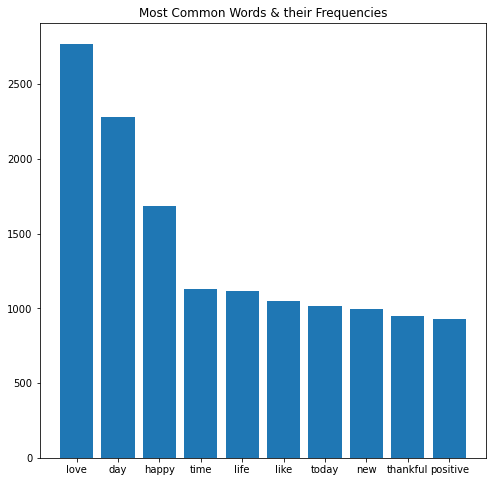

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.bar(words, num);
plt.title("Most Common Words & their Frequencies" );

### Joining tweets

In [ ]:
clean_tweets[0]

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

In [ ]:
tweets_clean = [" ".join(t) for t in clean_tweets]
tweets_clean[0]

'father dysfunctional selfish drags kids dysfunction run'

In [ ]:
X = tweets_clean
y = df.label.values

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [ ]:
print(len(X_train), len(X_test))

22373 9589


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer(max_features = 5000)

In [ ]:
x_train_tf = tf.fit_transform(X_train)
x_test_tf = tf.transform(X_test)

In [ ]:
print(x_train_tf.shape, x_test_tf.shape)

(22373, 5000) (9589, 5000)


### Ordinary Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(x_train_tf, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_train_pred = lg.predict(x_train_tf)
y_test_pred = lg.predict(x_test_tf)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Training Set Accuracy: %2.2f " % (accuracy_score(y_train, y_train_pred)*100))
print("Testing Set Accuracy: %2.2f " % (accuracy_score(y_test, y_test_pred)*100))

Training Set Accuracy: 95.48 
Testing Set Accuracy: 94.89 


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8924
           1       0.89      0.30      0.45       665

    accuracy                           0.95      9589
   macro avg       0.92      0.65      0.71      9589
weighted avg       0.95      0.95      0.94      9589



#### F1-Score is low for 1 (hate class), this is due to the classes imbalance 

### Adjusted Logistic Regression + resolving class imbalance

In [ ]:
lg2 = LogisticRegression(class_weight = 'balanced', random_state=0)
lg2.fit(x_train_tf, y_train)


LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
y_train_pred = lg2.predict(x_train_tf)
y_test_pred = lg2.predict(x_test_tf)

In [ ]:
print("Adjusted Logistic Regression + resolving class imbalance\n")
print("Training Set Accuracy: %2.2f " % (accuracy_score(y_train, y_train_pred)*100))
print("Testing Set Accuracy: %2.2f " % (accuracy_score(y_test, y_test_pred)*100))

Adjusted Logistic Regression + resolving class imbalance

Training Set Accuracy: 95.33 
Testing Set Accuracy: 92.57 


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20796
           1       0.60      0.97      0.75      1577

    accuracy                           0.95     22373
   macro avg       0.80      0.96      0.86     22373
weighted avg       0.97      0.95      0.96     22373



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8924
           1       0.48      0.75      0.58       665

    accuracy                           0.93      9589
   macro avg       0.73      0.85      0.77      9589
weighted avg       0.95      0.93      0.93      9589



#### There's a significant different between the F1-Scores of the train and test datasets, this could imply the represent of overfitting 

### Regularization and Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

In [ ]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100],
    'penalty': ["l1","l2", "elasticnet"]
}

lg3 = LogisticRegression(class_weight = 'balanced', random_state=0)
#lg3.fit(x_train_tf, y_train)

In [ ]:
gs = GridSearchCV(estimator = lg3, param_grid = param_grid, 
                  cv = StratifiedKFold(4), n_jobs = -1, 
                  verbose = 1, scoring = "recall" )

In [ ]:
gs.fit(x_train_tf, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.66200443        nan        nan 0.70131883        nan
        nan 0.76473527        nan        nan 0.77362494        nan
        nan 0.73748153        nan        nan 0.69183801        nan]
  category=UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

In [ ]:
gs.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
y_best_pred_train = gs.predict(x_train_tf)
y_best_pred_test = gs.predict(x_test_tf)

In [ ]:
print(classification_report(y_train, y_best_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20796
           1       0.60      0.97      0.75      1577

    accuracy                           0.95     22373
   macro avg       0.80      0.96      0.86     22373
weighted avg       0.97      0.95      0.96     22373



In [ ]:
print(classification_report(y_test, y_best_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8924
           1       0.48      0.75      0.58       665

    accuracy                           0.93      9589
   macro avg       0.73      0.85      0.77      9589
weighted avg       0.95      0.93      0.93      9589



### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_tf, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
y_best_pred_train_rf2 = rf_random.predict(x_train_tf)
y_best_pred_test_rf2 = rf_random.predict(x_test_tf)

In [ ]:
y_best_pred_train_rf[:10]

array([0.        , 0.07755819, 0.00275387, 0.00306671, 0.00195771,
       0.        , 0.00868919, 0.        , 0.        , 0.06561225])

In [ ]:
p_train = [1 if p >= 0.4 else 0 for p in y_best_pred_train_rf2]
p_test = [1 if p >= 0.4 else 0 for p in y_best_pred_test_rf2]

In [ ]:
con2 = Counter(p_train)
con2

Counter({0: 20827, 1: 1546})

In [ ]:
print(classification_report(y_train, p_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20796
           1       0.96      0.94      0.95      1577

    accuracy                           0.99     22373
   macro avg       0.98      0.97      0.97     22373
weighted avg       0.99      0.99      0.99     22373



In [ ]:
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8924
           1       0.70      0.58      0.64       665

    accuracy                           0.95      9589
   macro avg       0.84      0.78      0.81      9589
weighted avg       0.95      0.95      0.95      9589



In [ ]:
print("Training Set Accuracy: %2.2f " % (accuracy_score(y_train, p_train)*100))
print("Testing Set Accuracy: %2.2f " % (accuracy_score(y_test, p_test)*100))

Training Set Accuracy: 99.24 
Testing Set Accuracy: 95.39 


In [ ]:
from sklearn.metrics import f1_score
print("Training Set F1-Score: %2.2f " % (f1_score(y_train, p_train, average='weighted')*100))
print("Testing Set F1-Score: %2.2f " % (f1_score(y_test, p_test, average='weighted')*100))

Training Set F1-Score: 99.24 
Testing Set F1-Score: 95.19 


#### I accidently trained using a Regressor instead of a Classifier. This realization came after 6 hours of Grid Search

In [ ]:
pare = {'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
?RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 1600, min_samples_split= 10, min_samples_leaf= 1,
                             max_features= 'sqrt',max_depth= None, bootstrap= True)

clf.fit(x_train_tf, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=1600)

In [ ]:
y_best_pred_train_clf = clf.predict(x_train_tf)
y_best_pred_test_clf = clf.predict(x_test_tf)

In [ ]:
print(classification_report(y_train, y_best_pred_train_clf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20796
           1       0.98      0.86      0.92      1577

    accuracy                           0.99     22373
   macro avg       0.99      0.93      0.96     22373
weighted avg       0.99      0.99      0.99     22373



In [ ]:
print(classification_report(y_test, y_best_pred_test_clf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8924
           1       0.79      0.52      0.62       665

    accuracy                           0.96      9589
   macro avg       0.88      0.75      0.80      9589
weighted avg       0.95      0.96      0.95      9589



In [ ]:
print("Training Set Accuracy: %2.2f " % (accuracy_score(y_train, y_best_pred_train_clf)*100))
print("Testing Set Accuracy: %2.2f " % (accuracy_score(y_test, y_best_pred_test_clf)*100))

Training Set Accuracy: 98.90 
Testing Set Accuracy: 95.67 


In [ ]:
from sklearn.metrics import f1_score
print("Training Set F1-Score: %2.2f " % (f1_score(y_train, y_best_pred_train_rf2, average='weighted')*100))
print("Testing Set F1-Score: %2.2f " % (f1_score(y_test, y_best_pred_test_rf2, average='weighted')*100))

Training Set F1-Score: 98.87 
Testing Set F1-Score: 95.25 
